In [1]:
#loading dataset
import pandas as pd
import numpy as np
#EDA
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier ##TREE
#ensembling
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [4]:
# data=normalize(data)

In [ ]:
# data.isnull().sum()
# data.head()

In [3]:
print(len(data[data['target']==1]))

526


DECISION TREE

In [4]:
y = data["target"]
X = data.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,shuffle=True,random_state=3)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'gini',random_state=0,max_depth = None, min_samples_split=2, min_samples_leaf = 1, max_leaf_nodes = None, min_impurity_decrease=0.0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [8]:
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(np.flip(np.array(dt_conf_matrix)))
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[155   3]
 [  0 150]]


Accuracy of DecisionTreeClassifier: 99.02597402597402 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308



In [10]:
#plot tree
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 

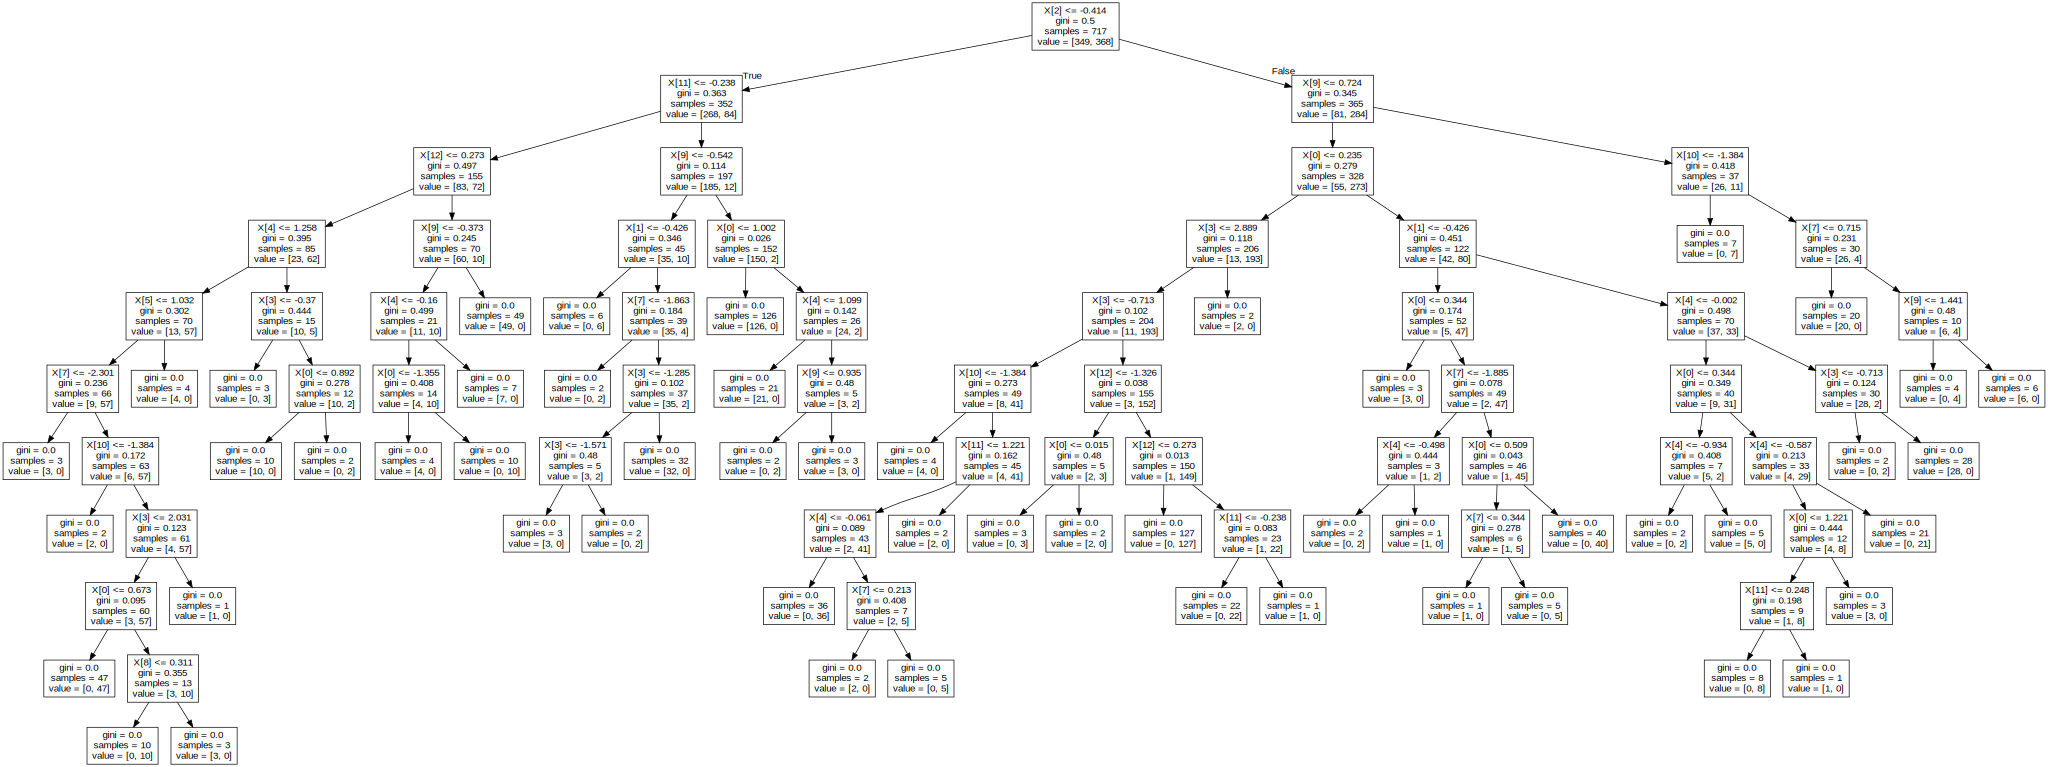

In [11]:
graph